In [7]:
import pandas as pd


# Gradient boosting machines

In [8]:
# !pip install xgboost

import xgboost as xgb
from util.functions import impute_and_train

df_numeric = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, xgb.XGBClassifier)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

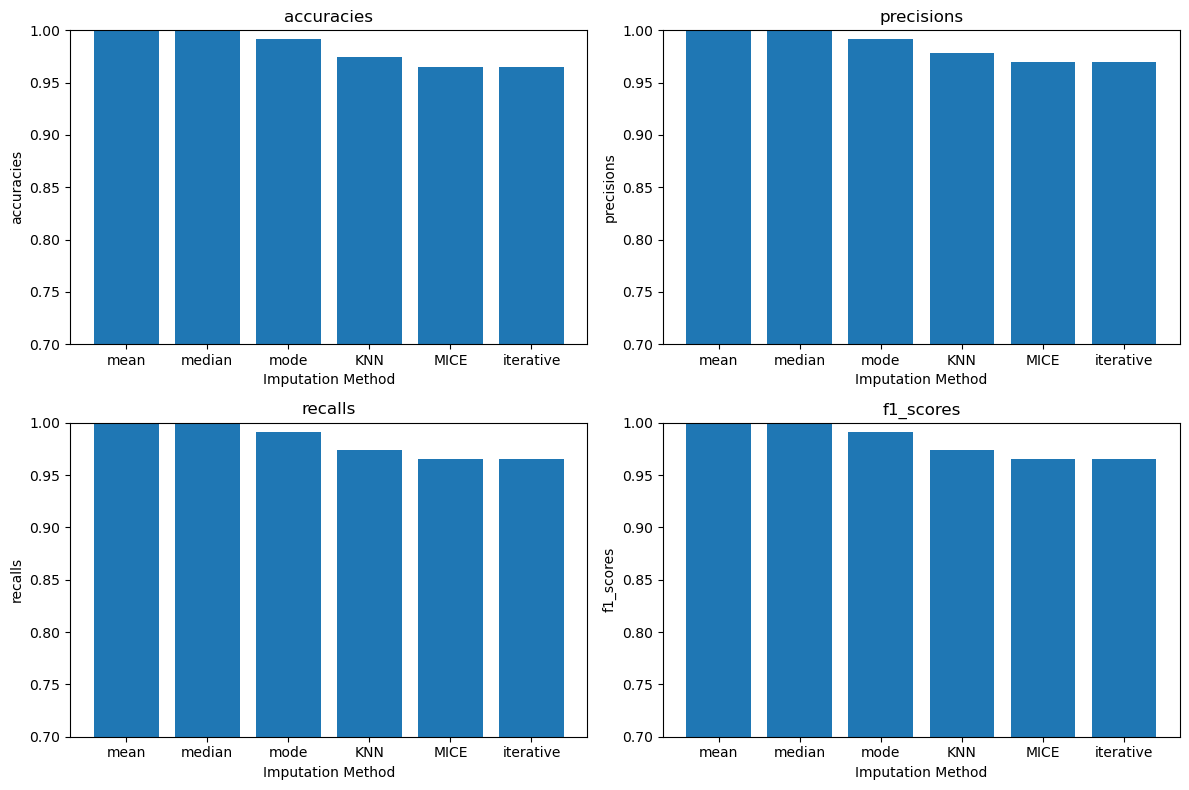

In [9]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

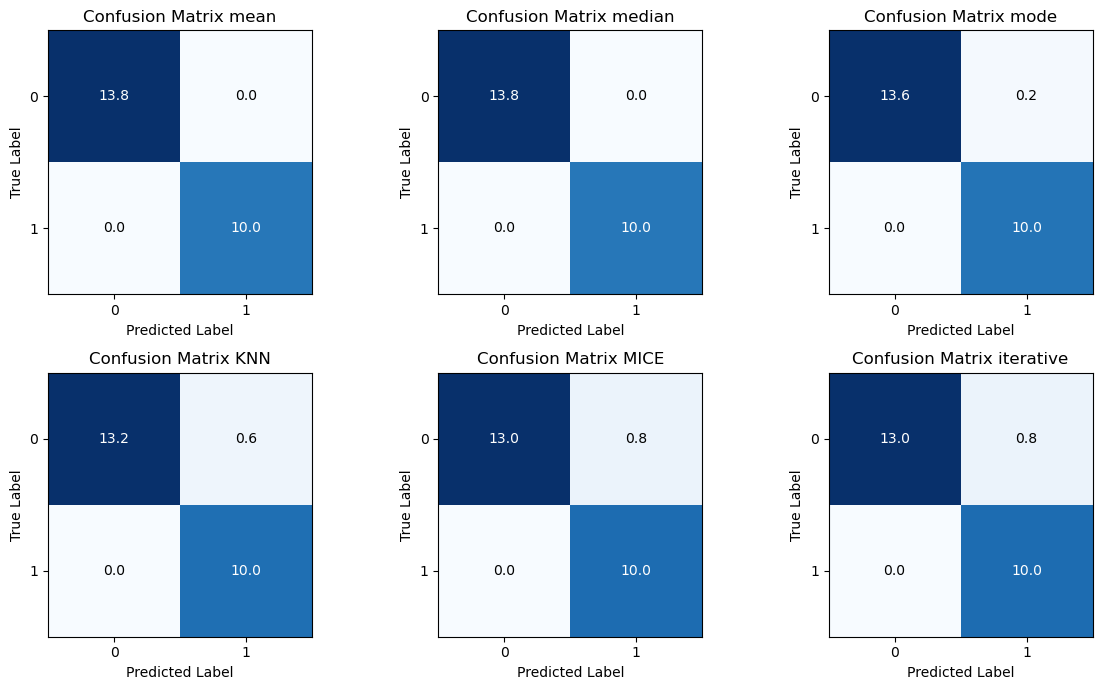

In [10]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

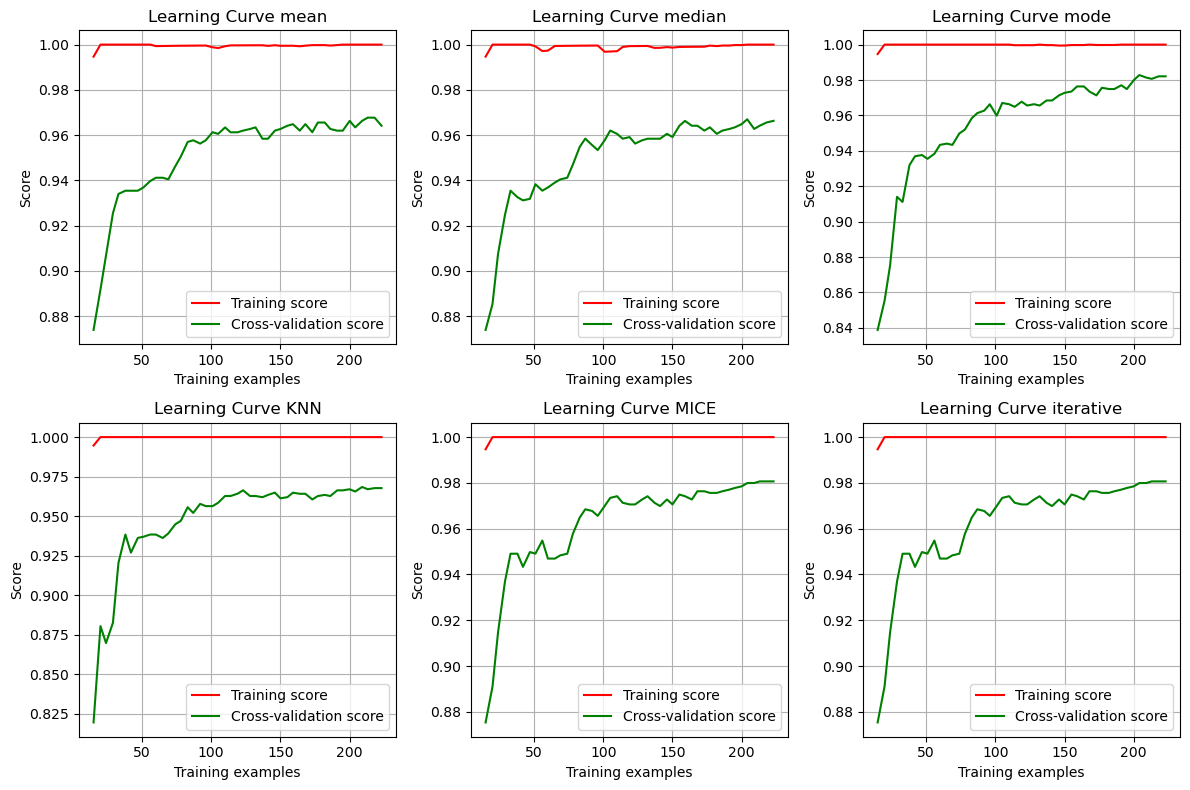

In [11]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

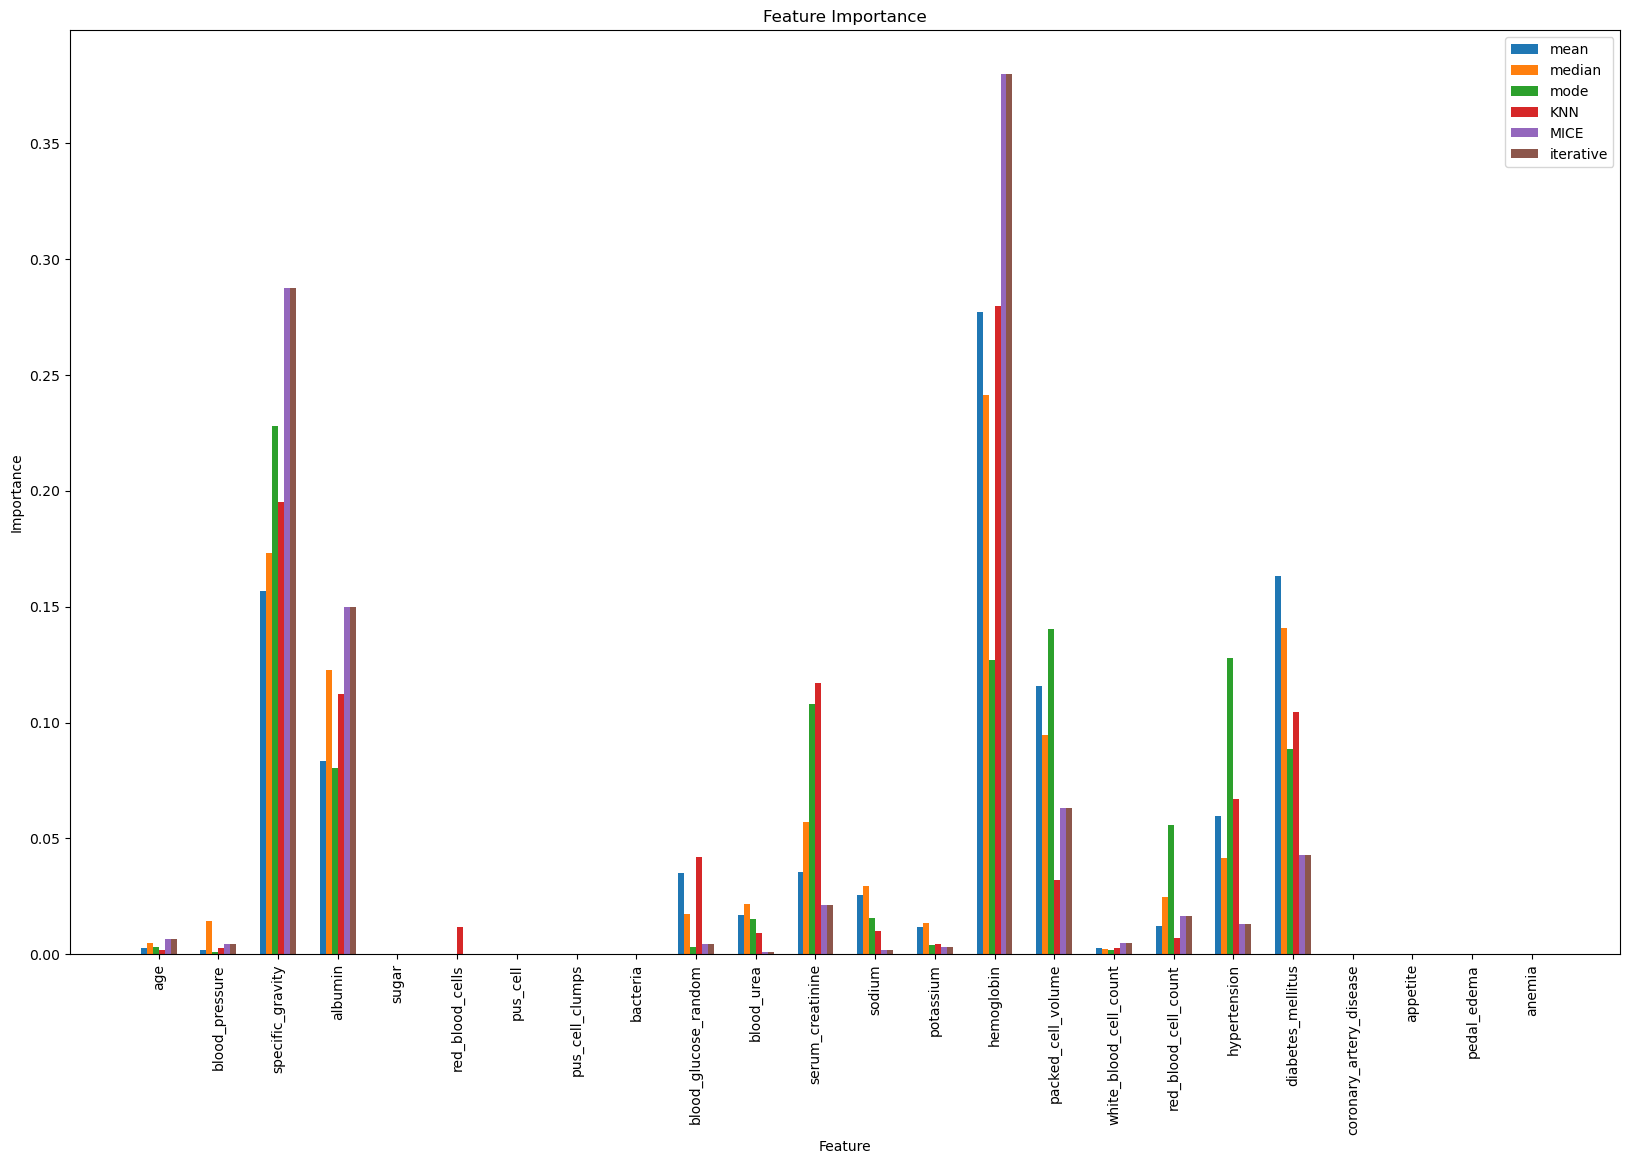

In [12]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np

from util.functions import plot_feature_importances
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
feature_importances_df = pd.DataFrame(columns=df_numeric.drop(columns=['class']).columns, index=pd.MultiIndex.from_product([results['models'].keys(), range(5)], names=['imputation', 'iteration']))

for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        normalized = model.feature_importances_ / np.sum(model.feature_importances_)
        fi.append(normalized)
        feature_importances_df.loc[(name, i)] = normalized
    
    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

feature_importances_df.to_csv('results/feature_importances_gradient_boosting.csv', index=True)
plot_feature_importances(feature_importances)

In [ ]:
metrics_xg = results['metrics']

metrics_xg = pd.DataFrame(metrics_xg)

metrics_xg.to_csv('metrics_xg.csv', index= False)